In [59]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
import pytesseract
from PIL import Image

CWD_PATH = os.getcwd()
TEST_IMAGE_PATH = os.path.join(CWD_PATH, 'test_images')
rectKernel = cv2.getStructuringElement(cv2.MORPH_RECT, (9, 3))

In [60]:
 # get grayscale image
def get_grayscale(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# noise removal
def remove_noise(image):
    return cv2.medianBlur(image,5)
 
#thresholding
def thresholding(image):
    return cv2.threshold(image, 0, 255, cv2.THRESH_OTSU + cv2.THRESH_BINARY)[1]

def dilate(image):
    kernel = np.ones((5,5),dtype=np.uint8)
    return cv2.dilate(image, kernel, iterations = 1)

def preprocess(image, scale=1):
    gray = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)
    resized = cv2.resize(gray,(image.shape[1]//scale,image.shape[0]//scale))
    blur = cv2.blur(resized,(5,5))
    thresh = cv2.threshold(blur, 100, 255, cv2.THRESH_OTSU + cv2.THRESH_BINARY)[1]

    return thresh



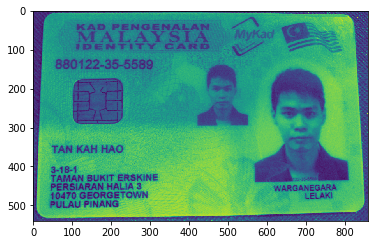

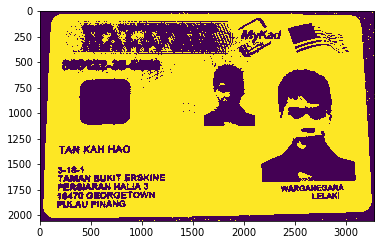

TAN KAH HAO

3-18-1
TAMAN BUKIT ERSKINE
PERSIARAN HALIA 3
40470 GEORGETOWN
PULAU PINANG

 

text 2
TAN KAH HAO

3-18-1
TAMAN BUKIT ERSKINE
PERSIARAN HALIA 3
40470 GEORGETOWN
PULAU PINANG

 

nric
IDENTITY «
880122-35-5589
a



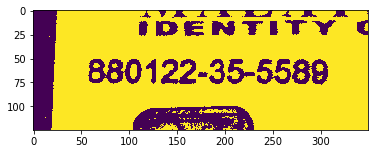

In [74]:
img_file = os.path.join(TEST_IMAGE_PATH,'cropped_(9)00012.jpg')
#image = cv2.imread(img_file)
image = cv2.imread(img_file, cv2.IMREAD_COLOR)
gray = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)
uint8 = cv2.resize(gray,(860,540),cv2.INTER_AREA)
img = preprocess(image)
plt.imshow(uint8)
plt.show()
plt.imshow(img)
plt.show()
nric = uint8[75:200,0:350]
nric = cv2.threshold(nric, 100, 255, cv2.THRESH_BINARY)[1]
plt.imshow(nric)
#plt.show()

text = pytesseract.image_to_string(img, lang ='eng+msa')

text2 = pytesseract.image_to_string(img)

text3 = pytesseract.image_to_string(nric,config='digits')
print(text)
print('text 2')
print(text2)
print('nric')
print(text3)